# Gapped k-mer Support Vector Machine (gkSVM) Evaluation

**Authorship:**
Adam Klie, *09/26/2021*
***
**Description:**
Notebook for the interpretation of gkSVM model predictions based on gkmexplain
***
**TODOs:**
 - <font color='red'> Set-up notebook </font>
 - <font color='red'> Load test dataset + predictions + other needed data </font>
 - <font color='red'> For each sequence </font>
***

# Set-up

## Imports

In [1]:
# Classics
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# For stats
from scipy import stats

# For ml
from sklearn.metrics import confusion_matrix
import vizsequence
from vizsequence import viz_sequence

# Autoreload extension
if 'autoreload' not in get_ipython().extension_manager.loaded:
    %load_ext autoreload
    
%autoreload 2

# Local Paths
import sys
sys.path.append('/cellar/users/aklie/projects/EUGENE/bin/')
import project_utils
import otx_enhancer_utils

# Set-up

In [2]:
# Data params
TRAIN_DATASET = "2021_OLS_Library"  # Which dataset to look at
FEATURES = "fasta"  # What features to use to train the model
LABELS = "binary"
PREPROCESS = "0.09-0.4"  # Preprocessing steps, separated by "-"
SPLIT = 0.9
SUBSET = False

In [3]:
# gkSVM hyperparams. See documentation for what each means
KERNEL="2"
WORD_LENGTH="11"
INFORM_COLS="7"
MISMATCHES="3"
REG_PARAM="1.0"
POS_WEIGHT="1.0"
REV_COMP=True
HYPERPARAM = "{}-{}-{}-{}-{}-{}-{}".format(KERNEL, 
                                           WORD_LENGTH, INFORM_COLS, MISMATCHES, 
                                           REV_COMP,
                                           REG_PARAM, POS_WEIGHT)
ARCHITECTURE = "gkSVM"

In [4]:
# Output directory
OUTDIR="{}_{}_{}_{}".format(PREPROCESS, FEATURES, HYPERPARAM, ARCHITECTURE)
if not os.path.exists(OUTDIR):
    print("Directory doesn't exist exists")
else:
    print("Using {}".format(OUTDIR))

Using 0.09-0.4_fasta_2-11-7-3-True-1.0-1.0_gkSVM


# "Load" the model

In [5]:
model = "{}_{}_{}-clf_{}".format(PREPROCESS, FEATURES, ARCHITECTURE, HYPERPARAM)
model_name = os.path.join(OUTDIR, model)
if os.path.exists("{}.model.txt".format(model_name)):
    print("Using {}.model.txt to make predictions".format(model_name))
else:
    print("No model at {}.model.txt exists".format(model_name))

Using 0.09-0.4_fasta_2-11-7-3-True-1.0-1.0_gkSVM/0.09-0.4_fasta_gkSVM-clf_2-11-7-3-True-1.0-1.0.model.txt to make predictions


# Make predictions

## Holdout set

In [119]:
dataset = "2021_OLS_Library"

In [120]:
in_dir = "/cellar/users/aklie/projects/EUGENE/data/{0}/fasta".format(dataset)
val = "{0}_X-holdout_{1}.fa".format("0.09-0.4", FEATURES)
seqs = os.path.join(in_dir, val)
if os.path.exists(seqs):
    print("Using {} to make predictions".format(seqs))
else:
    print("No sequences at {} exist".format(seqs))

Using /cellar/users/aklie/projects/EUGENE/data/2021_OLS_Library/fasta/0.09-0.4_X-holdout_fasta.fa to make predictions


In [121]:
print("Run: sbatch --job-name=evaluate_{0} -o {1}/evaluate_{0}.out -e {1}/evaluate_{0}.err gkSVM_evaluate.sh {2} {3} {0}".format(val[:-3], OUTDIR, seqs, model_name))

Run: sbatch --job-name=evaluate_0.09-0.4_X-holdout_fasta -o 0.09-0.4_fasta_2-11-7-3-True-1.0-1.345_gkSVM/evaluate_0.09-0.4_X-holdout_fasta.out -e 0.09-0.4_fasta_2-11-7-3-True-1.0-1.345_gkSVM/evaluate_0.09-0.4_X-holdout_fasta.err gkSVM_evaluate.sh /cellar/users/aklie/projects/EUGENE/data/2021_OLS_Library/fasta/0.09-0.4_X-holdout_fasta.fa 0.09-0.4_fasta_2-11-7-3-True-1.0-1.345_gkSVM/0.09-0.4_fasta_gkSVM-clf_2-11-7-3-True-1.0-1.345 0.09-0.4_X-holdout_fasta


In [122]:
#!sbatch --job-name=evaluate_0.09-0.4_X-holdout_fasta -o 0.09-0.4_fasta_2-11-7-3-True-1.0-1.345_gkSVM/evaluate_0.09-0.4_X-holdout_fasta.out -e 0.09-0.4_fasta_2-11-7-3-True-1.0-1.345_gkSVM/evaluate_0.09-0.4_X-holdout_fasta.err gkSVM_evaluate.sh /cellar/users/aklie/projects/EUGENE/data/2021_OLS_Library/fasta/0.09-0.4_X-holdout_fasta.fa 0.09-0.4_fasta_2-11-7-3-True-1.0-1.345_gkSVM/0.09-0.4_fasta_gkSVM-clf_2-11-7-3-True-1.0-1.345 0.09-0.4_X-holdout_fasta

Submitted batch job 1036416


## Full genomic sequences

In [123]:
dataset = "All_Genomic_Sequences"

In [124]:
in_dir = "/cellar/users/aklie/projects/EUGENE/data/{0}/fasta".format(dataset)
val = "X_{}.fa".format(FEATURES)
seqs = os.path.join(in_dir, val)
if os.path.exists(seqs):
    print("Using {} to make predictions".format(seqs))
else:
    print("No sequences at {} exist".format(seqs))

Using /cellar/users/aklie/projects/EUGENE/data/All_Genomic_Sequences/fasta/X_fasta.fa to make predictions


In [125]:
print("Run: sbatch --job-name=evaluate_{0} -o {1}/evaluate_{0}.out -e {1}/evaluate_{0}.err gkSVM_evaluate.sh {2} {3} {0}".format(dataset, OUTDIR, seqs, model_name))

Run: sbatch --job-name=evaluate_All_Genomic_Sequences -o 0.09-0.4_fasta_2-11-7-3-True-1.0-1.345_gkSVM/evaluate_All_Genomic_Sequences.out -e 0.09-0.4_fasta_2-11-7-3-True-1.0-1.345_gkSVM/evaluate_All_Genomic_Sequences.err gkSVM_evaluate.sh /cellar/users/aklie/projects/EUGENE/data/All_Genomic_Sequences/fasta/X_fasta.fa 0.09-0.4_fasta_2-11-7-3-True-1.0-1.345_gkSVM/0.09-0.4_fasta_gkSVM-clf_2-11-7-3-True-1.0-1.345 All_Genomic_Sequences


In [126]:
!sbatch --job-name=evaluate_All_Genomic_Sequences -o 0.09-0.4_fasta_2-11-7-3-True-1.0-1.345_gkSVM/evaluate_All_Genomic_Sequences.out -e 0.09-0.4_fasta_2-11-7-3-True-1.0-1.345_gkSVM/evaluate_All_Genomic_Sequences.err gkSVM_evaluate.sh /cellar/users/aklie/projects/EUGENE/data/All_Genomic_Sequences/fasta/X_fasta.fa 0.09-0.4_fasta_2-11-7-3-True-1.0-1.345_gkSVM/0.09-0.4_fasta_gkSVM-clf_2-11-7-3-True-1.0-1.345 All_Genomic_Sequences

Submitted batch job 1036417


# Generate explanations

## Genomic sequences

In [6]:
dataset = "All_Genomic_Sequences"

In [7]:
in_dir = "/cellar/users/aklie/projects/EUGENE/data/{0}/fasta".format(dataset)
val = "X_{}.fa".format(FEATURES)
seqs = os.path.join(in_dir, val)
if os.path.exists(seqs):
    print("Using {} to make predictions".format(seqs))
else:
    print("No sequences at {} exist".format(seqs))

Using /cellar/users/aklie/projects/EUGENE/data/All_Genomic_Sequences/fasta/X_fasta.fa to make predictions


In [8]:
print("Run: sbatch --job-name=evaluate_{0} -o {1}/evaluate_{0}.out -e {1}/evaluate_{0}.err gkSVM_evaluate.sh {2} {3} {0}".format(dataset, OUTDIR, seqs, model_name))

Run: sbatch --job-name=evaluate_All_Genomic_Sequences -o 0.09-0.4_fasta_2-11-7-3-True-1.0-1.0_gkSVM/evaluate_All_Genomic_Sequences.out -e 0.09-0.4_fasta_2-11-7-3-True-1.0-1.0_gkSVM/evaluate_All_Genomic_Sequences.err gkSVM_evaluate.sh /cellar/users/aklie/projects/EUGENE/data/All_Genomic_Sequences/fasta/X_fasta.fa 0.09-0.4_fasta_2-11-7-3-True-1.0-1.0_gkSVM/0.09-0.4_fasta_gkSVM-clf_2-11-7-3-True-1.0-1.0 All_Genomic_Sequences


In [126]:
!sbatch --job-name=evaluate_All_Genomic_Sequences -o 0.09-0.4_fasta_2-11-7-3-True-1.0-1.345_gkSVM/evaluate_All_Genomic_Sequences.out -e 0.09-0.4_fasta_2-11-7-3-True-1.0-1.345_gkSVM/evaluate_All_Genomic_Sequences.err gkSVM_evaluate.sh /cellar/users/aklie/projects/EUGENE/data/All_Genomic_Sequences/fasta/X_fasta.fa 0.09-0.4_fasta_2-11-7-3-True-1.0-1.345_gkSVM/0.09-0.4_fasta_gkSVM-clf_2-11-7-3-True-1.0-1.345 All_Genomic_Sequences

Submitted batch job 1036417


# Evaluate on validation set

In [9]:
# Get the validation set scores
val_file = "{}.test.predict.txt".format(model_name)
val_df = pd.read_csv(val_file, delim_whitespace=True, header=None, names=["NAME", "SCORES"])
val_df["PREDS"] = (val_df["SCORES"] >= 0).astype(int)

# Load training dataframe
OLS_dataset = pd.read_csv("../data/2021_OLS_Library/2021_OLS_Library.tsv", sep="\t")
OLS_dataset.head(1)

# Merge
val_df = pd.merge(OLS_dataset, val_df, on="NAME")

/cellar/users/aklie/opt/miniconda3/envs/ml_env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [10]:
data = val_df

## <u> **Confusion matrix** </u>

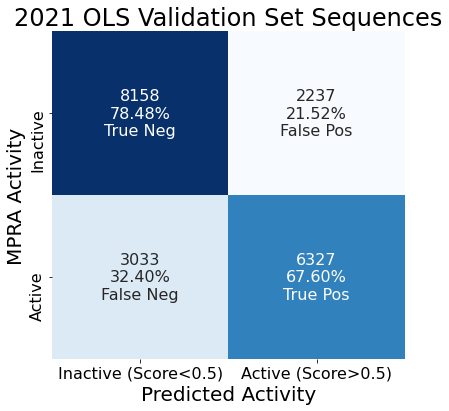

In [11]:
project_utils.cf_plot_from_df(data, label_col="MPRA_FXN", title="2021 OLS Validation Set Sequences", ylab="MPRA Activity")

## <u> **Correlation w/ activity** </u>

0.5267853234228717 0.0


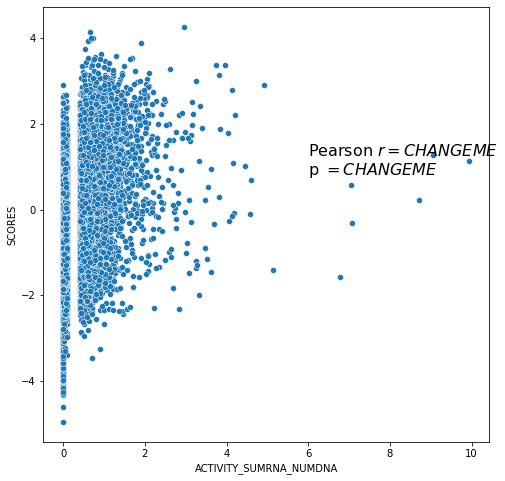

In [12]:
# Plot scatter
fig, ax = plt.subplots(1, 1, figsize=(8,8))
#sns.regplot(data=data, x="ACTIVITY_SUMRNA_NUMDNA", y="SCORES", x_jitter=.5, ax=ax)
sns.scatterplot(data=data, x="ACTIVITY_SUMRNA_NUMDNA", y="SCORES", ax=ax)

# Add pearson
no_na = (~data["ACTIVITY_SUMRNA_NUMDNA"].isna())
r, p = stats.spearmanr(data[no_na]["ACTIVITY_SUMRNA_NUMDNA"], data[no_na]["SCORES"])
print(r, p)
ax.annotate(r'Pearson $r = CHANGE ME$' + '\n' + r'p $=CHANGE ME$', (6, 0.8), fontsize=16);

## <u> **Threshold plot** </u>

93it [00:04, 21.97it/s]


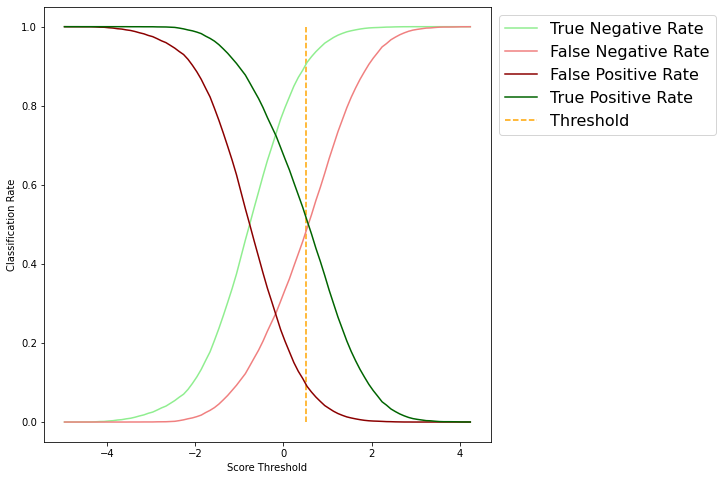

In [114]:
project_utils.threshold_plot(data, label_col="MPRA_FXN")

## <u> **Score distribution plot** </u>

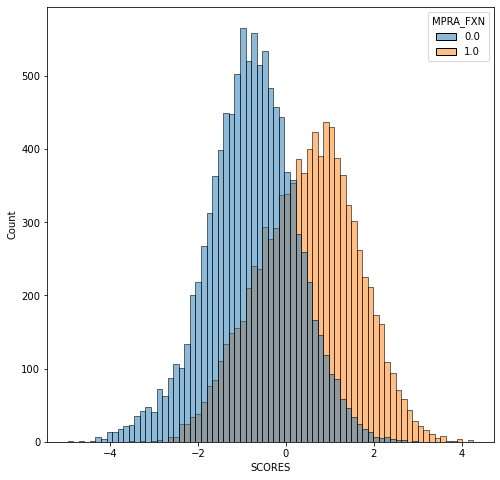

In [13]:
fig, ax = plt.subplots(1,1, figsize=(8,8))
sns.histplot(data=data, x="SCORES", hue="MPRA_FXN", ax=ax);
ax.vlines(0.5, 0, 1, color="red", linestyle="dashed", label="Threshold");

# Evaluate on hold-out sequences

In [17]:
# Get the validation set scores
holdout_file = "{}.{}_X-holdout_fasta.predict.txt".format(model_name, PREPROCESS)
holdout_df = pd.read_csv(holdout_file, delim_whitespace=True, header=None, names=["NAME", "SCORES"])
holdout_df["PREDS"] = (holdout_df["SCORES"] >= 0).astype(int)

# Load training dataframe
OLS_dataset = pd.read_csv("../data/2021_OLS_Library/2021_OLS_Library.tsv", sep="\t")
OLS_dataset.head(1)

# Merge
holdout_df = pd.merge(OLS_dataset, holdout_df, on="NAME")

/cellar/users/aklie/opt/miniconda3/envs/ml_env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [19]:
microscope_mask = (~holdout_df["MICROSCOPE_FXN"].isna())
microscope_df = holdout_df[microscope_mask]
microscope_df["microscope_label"] = (~(microscope_df["MICROSCOPE_FXN"] == "Non-Functional")).astype(int)
data = microscope_df
microscope_colors = dict(zip(data["MICROSCOPE_FXN"].unique(), ["darkgreen", "lightgreen", "gold", "red"]))
data["microscope_label"].value_counts()

<ipython-input-19-764356113563>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  microscope_df["microscope_label"] = (~(microscope_df["MICROSCOPE_FXN"] == "Non-Functional")).astype(int)


1    52
0    26
Name: microscope_label, dtype: int64

### <u> **Confusion matrix** </u>

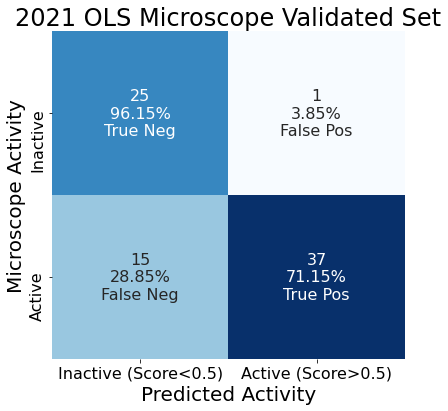

In [20]:
project_utils.cf_plot_from_df(data, label_col="microscope_label", title="2021 OLS Microscope Validated Set", ylab="Microscope Activity")

### <u> **Activity boxplot grouped by function** </u>

/cellar/users/aklie/opt/miniconda3/envs/ml_env/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 7.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


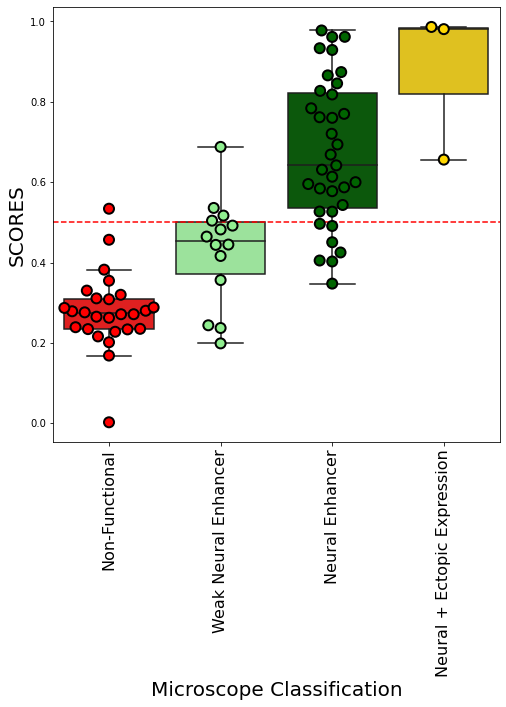

In [257]:
microscope_order = ['Non-Functional', 'Weak Neural Enhancer', 'Neural Enhancer', 'Neural + Ectopic Expression']
fig, ax = plt.subplots(1, 1, figsize=(8,8))
sns.boxplot(y=data["SCORES"], x=data["MICROSCOPE_FXN"], order=microscope_order, palette=microscope_colors, ax=ax)
sns.swarmplot(y=data["SCORES"], x=data["MICROSCOPE_FXN"], order=microscope_order, palette=microscope_colors, size=10, edgecolor="black", linewidth=2, ax=ax)
ax.hlines(0.5, ax.get_xlim()[0], ax.get_xlim()[1], color="red", linestyle="dashed")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=16);
ax.set_xlabel("Microscope Classification", fontsize=20)
ax.set_ylabel("SCORES", fontsize=20);

### <u> **Swarmplot of scores** </u>

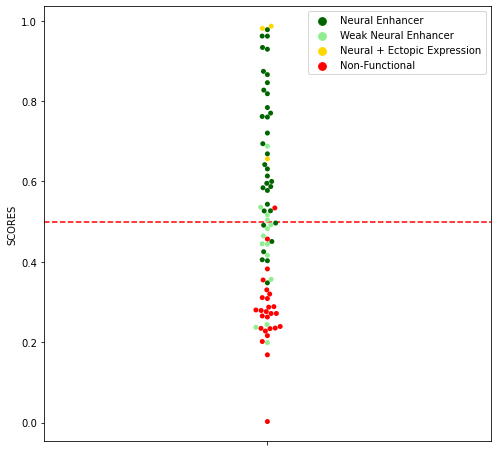

In [258]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
sns.swarmplot(y=data["SCORES"], hue=data["MICROSCOPE_FXN"], x=[""]*len(data), palette=microscope_colors, ax=ax)
plt.legend(bbox_to_anchor=(1,1))
ax.hlines(0.5, ax.get_xlim()[0], ax.get_xlim()[1], color="red", linestyle="dashed");

### <u> **Scatterplot with activity** </u>

0.5915345131586822 1.1782417542640942e-08


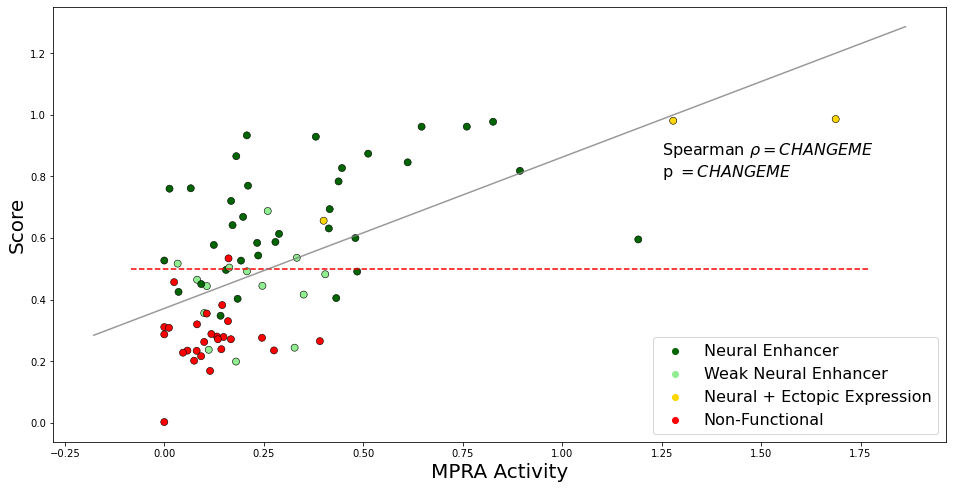

In [259]:
m, b = np.polyfit(data["ACTIVITY_SUMRNA_NUMDNA"], data["SCORES"], 1)

fig, ax = plt.subplots(1, 1, figsize=(16,8))
sns.scatterplot(data=data, x="ACTIVITY_SUMRNA_NUMDNA", y="SCORES", hue="MICROSCOPE_FXN", palette=microscope_colors, s=50, edgecolor="black", ax=ax)
ax.hlines(0.5, ax.get_xlim()[0], ax.get_xlim()[1], color="red", linestyle="dashed");
ax.set_xlabel("MPRA Activity", fontsize=20)
ax.set_ylabel("Score", fontsize=20);
ax.legend(title='Microscope Classification', fontsize=16)

# Add trendline
x=np.arange(ax.get_xlim()[0], ax.get_xlim()[1], 0.01)
ax.plot(x, m*x + b, '-', color = "grey", alpha=0.8)
ax.legend(loc="lower right", fontsize=16)

# Add pearson
no_na = (~data["ACTIVITY_SUMRNA_NUMDNA"].isna())
r, p = stats.spearmanr(data[no_na]["ACTIVITY_SUMRNA_NUMDNA"], data[no_na]["SCORES"])
print(r, p)
ax.annotate(r'Spearman $\rho = CHANGE ME$' + '\n' + r'p $=CHANGEME$', (1.25, 0.8), fontsize=16);

## No label sequences

In [260]:
ambiguous_df = holdout_df[~microscope_mask]
data = ambiguous_df

0.22728819822727914 0.0


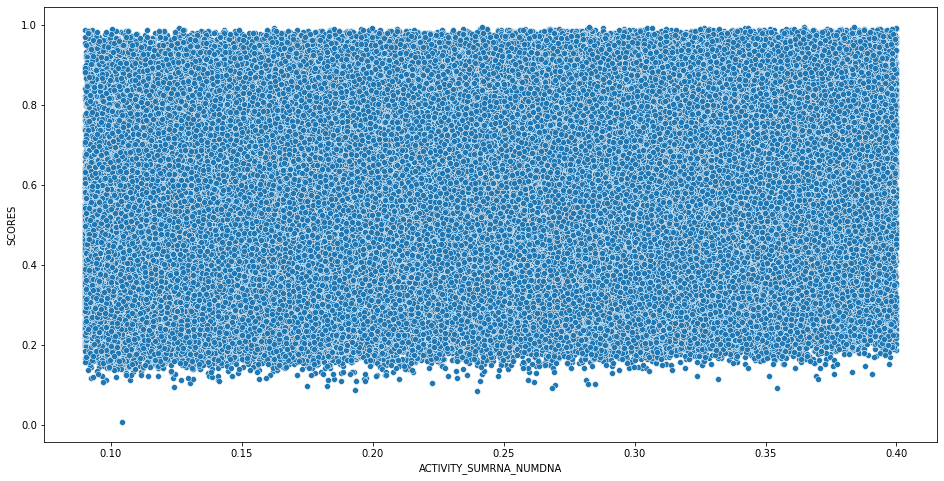

In [261]:
fig, ax = plt.subplots(1, 1, figsize=(16,8))
sns.scatterplot(data=ambiguous_df, x="ACTIVITY_SUMRNA_NUMDNA", y="SCORES", ax=ax)
no_na = (~ambiguous_df["ACTIVITY_SUMRNA_NUMDNA"].isna())
p, r = stats.pearsonr(ambiguous_df[no_na]["ACTIVITY_SUMRNA_NUMDNA"], ambiguous_df[no_na]["SCORES"])
print(p, r)

# Evaluate on genomic dataset

## Load data

In [14]:
# Define the dataset to grab data from
dataset = "All_Genomic_Sequences"

In [15]:
# Define the important files for this dataset
dataframe_f = "../data/{0}/{0}.tsv".format(dataset)
scores_f = "{}.{}.predict.txt".format(model_name, dataset)
print("Loading data for {}\n\tdataframe: {}\n\tscores: {}".format(dataset, dataframe_f, scores_f))

# Load the dataframe
test_dataset = pd.read_csv(dataframe_f, sep="\t")

# Load the scores for these sequences
test_scores = pd.read_csv(scores_f, delim_whitespace=True, header=None, names=["NAME", "SCORE"])
test_scores["PREDS"] = (test_scores["SCORE"] >= 0).astype(int)

# Compile predictions on val
test_df = pd.merge(test_dataset, test_scores, on="NAME")

Loading data for All_Genomic_Sequences
	dataframe: ../data/All_Genomic_Sequences/All_Genomic_Sequences.tsv
	scores: 0.09-0.4_fasta_2-11-7-3-True-1.0-1.0_gkSVM/0.09-0.4_fasta_gkSVM-clf_2-11-7-3-True-1.0-1.0.All_Genomic_Sequences.predict.txt


## Confusion Matrix

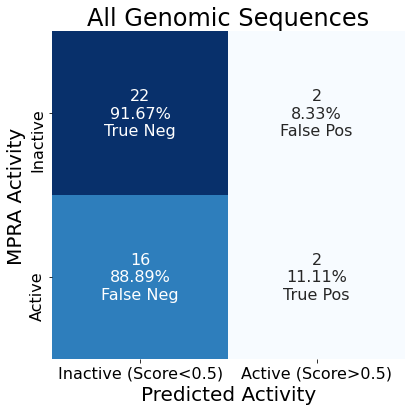

In [16]:
project_utils.cf_plot_from_df(test_df, label_col="FXN_LABEL", title=dataset.replace("_", " "), ylab="MPRA Activity")

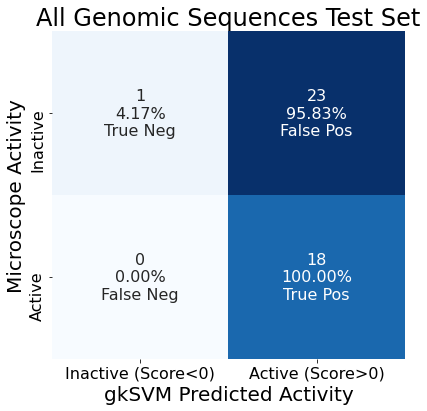

In [54]:
fig, ax = plt.subplots(1,1,figsize=(6,6))

rc = {"font.size": 16}
with plt.rc_context(rc):
    cf_names = ["True Neg","False Pos", "False Neg","True Pos"]
    cf_mtx = confusion_matrix(test_clf["FXN_LABEL"], test_clf["GKSVM_PREDS"])
    cf_pcts = ["{0:.2%}".format(value) for value in (cf_mtx/cf_mtx.sum(axis=1)[:,None]).flatten()]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(cf_mtx.flatten(),cf_pcts, cf_names)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_mtx, annot=labels, fmt='s', cmap='Blues', cbar=False, ax=ax)
    ax.set_xlabel('gkSVM Predicted Activity', fontsize=20)
    ax.set_ylabel('Microscope Activity', fontsize=20)
    ax.set_title('{} Test Set'.format(dataset.replace("_", " ")), fontsize=24)
    ax.set_yticklabels(["Inactive", "Active"], fontsize=16)
    ax.set_xticklabels(["Inactive (Score<0)", "Active (Score>0)"], fontsize=16)
    plt.tight_layout();

## gkSVM Explain Results

In [5]:
explain_f = os.path.join(OUTDIR, "{}.explanations.txt".format(dataset))
fasta_f = "../data/{}/fasta/X_fasta.fa".format(dataset)

print("Loading data for {}\n\texplanations: {}\n\tfasta: {}".format(dataset, explain_f, fasta_f))
impscores, seqs, IDs, ohe_seqs = project_utils.get_gksvm_explain_data(explain_f, fasta_f)

Loading data for 2021_OLS_Exact_Syntax_Match
	explanations: ../gkSVM/Result_0.09-0.4_fasta_gkSVM-clf_final-selected/2021_OLS_Exact_Syntax_Match.explanations.txt
	fasta: ../data/2021_OLS_Exact_Syntax_Match/fasta/X_fasta.fa


/cellar/users/aklie/projects/EUGENE/bin/project_utils.py:561: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  onehot_data = np.array([one_hot_encode_along_channel_axis(x) for x in fasta_seqs])


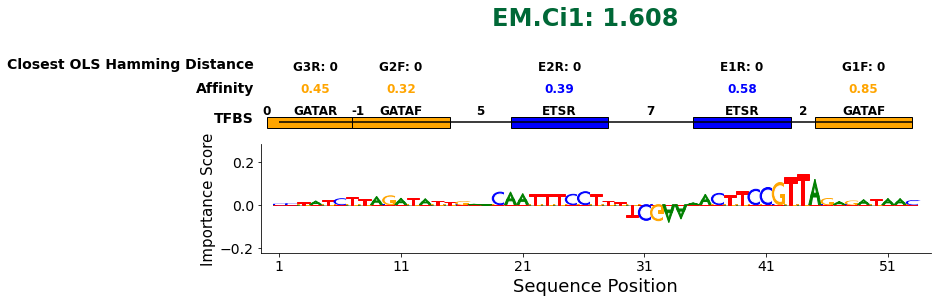

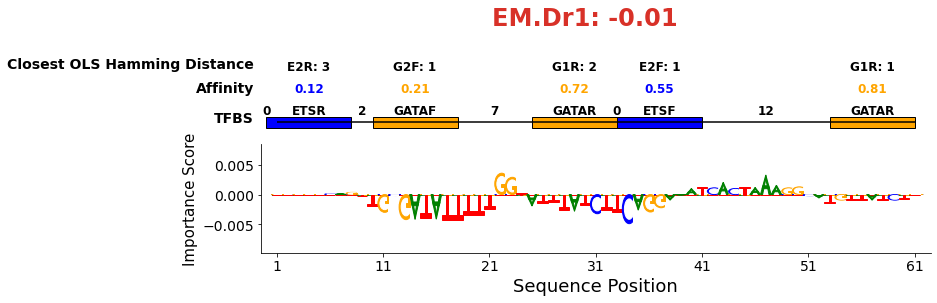

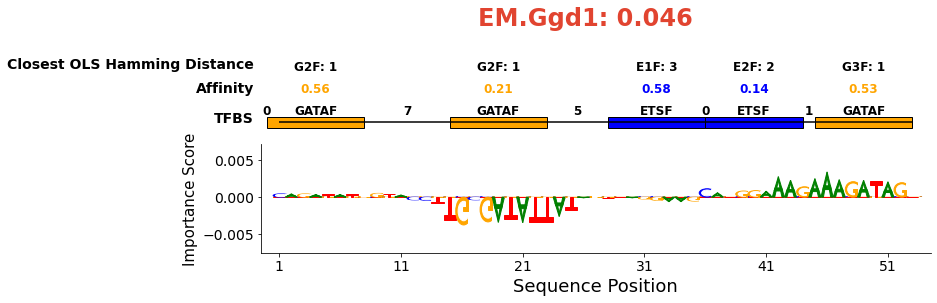

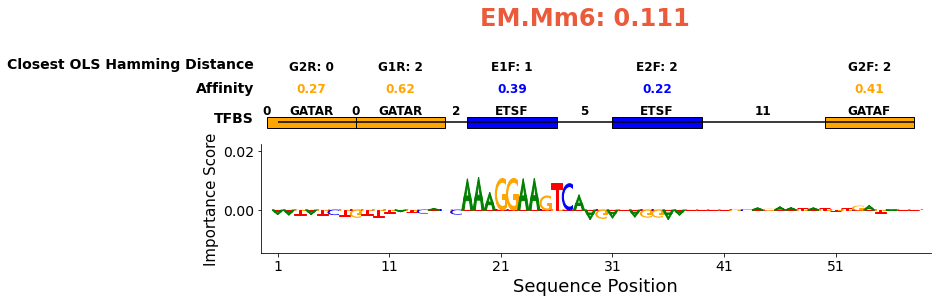

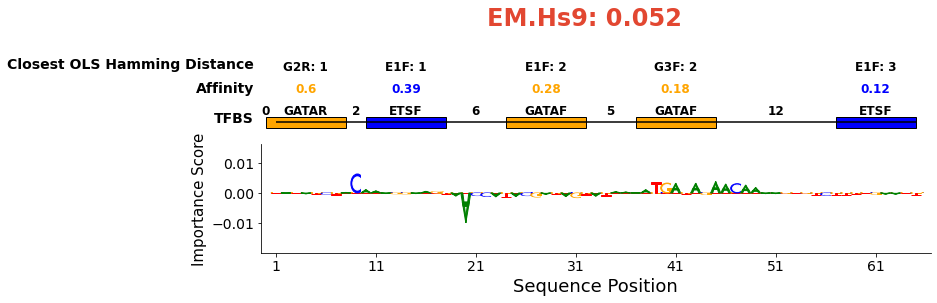

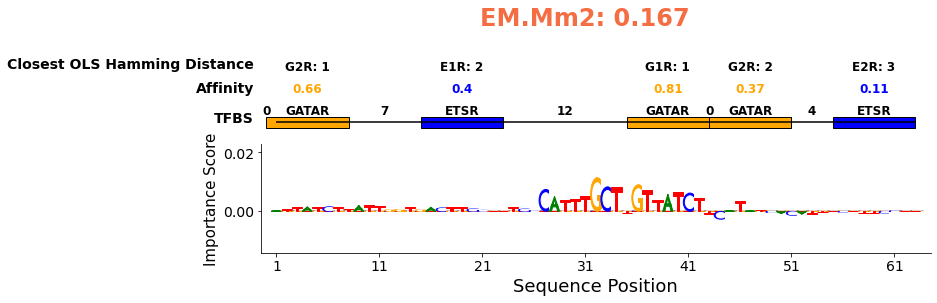

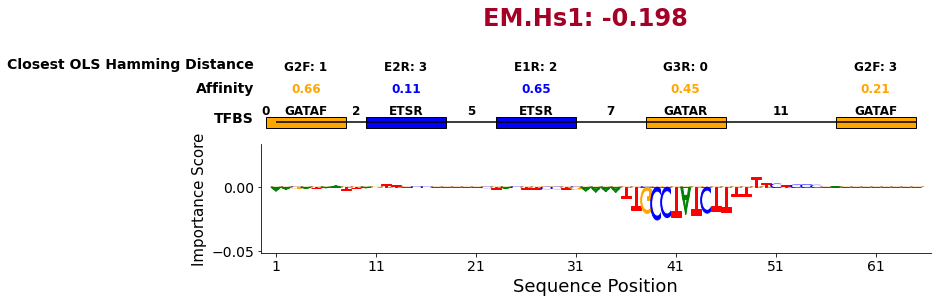

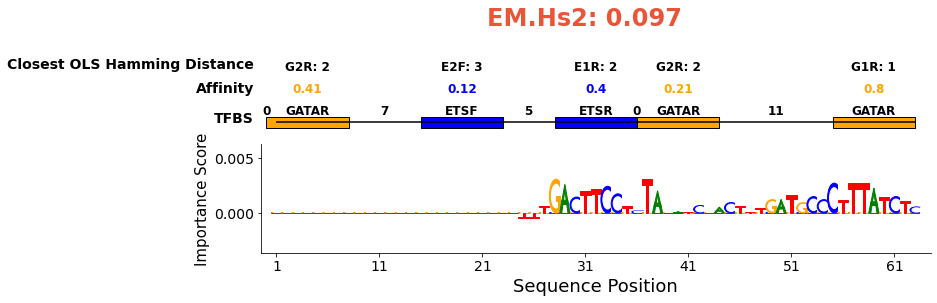

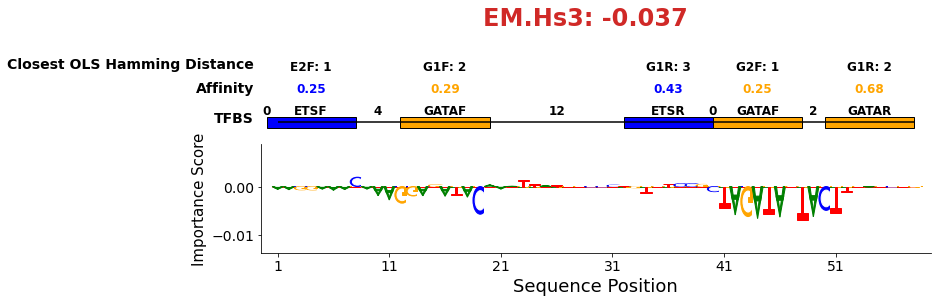

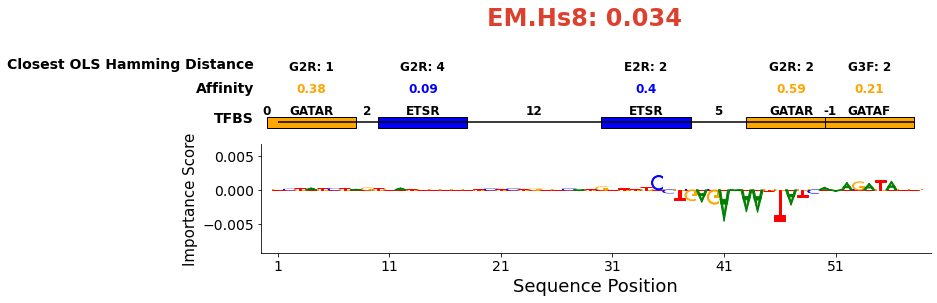

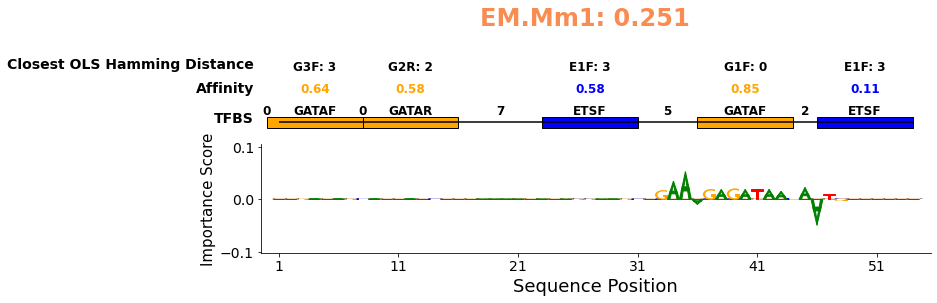

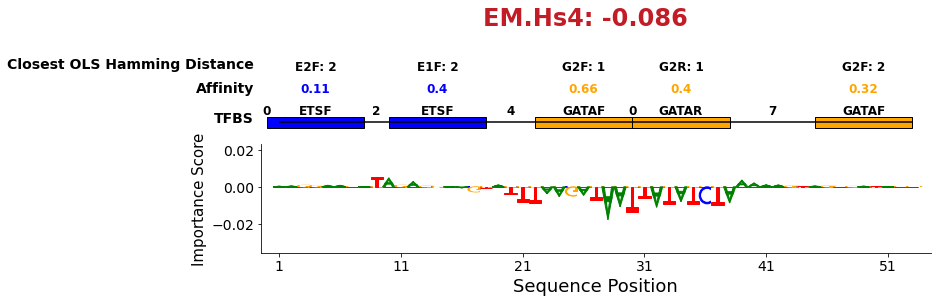

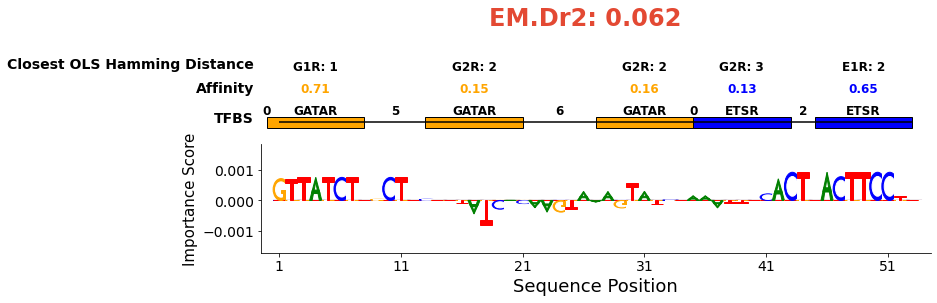

In [16]:
cmap = mpl.cm.RdYlGn
norm = mpl.colors.Normalize(vmin=test_clf["GKSVM_SCORE"].min(), vmax=test_clf["GKSVM_SCORE"].max())
for i in range(len(seqs)):
    otx_enhancer_utils.otxGenomeTracks(seqs[i], importance_scores=impscores[i], seq_name=test_clf["NAME"].iloc[i], model_pred=test_clf["GKSVM_SCORE"].iloc[i], cmap=cmap, norm=norm)

# Scratch

In [35]:
# Read in scores
impscores = [
    np.array( [[float(z) for z in y.split(",")] for y in x.rstrip().split("\t")[2].split(";")])
    for x in open(explain_f)
]
fasta_seqs = [x.rstrip() for (i,x) in enumerate(open(fasta_f))
              if i%2==1]
fasta_ids = [x.rstrip().replace(">", "") for (i,x) in enumerate(open(fasta_f))
              if i%2==0]
onehot_data = np.array([project_utils.one_hot_encode_along_channel_axis(x)
                         for x in fasta_seqs])

<ipython-input-35-5b4fa84a834f>:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  onehot_data = np.array([project_utils.one_hot_encode_along_channel_axis(x)


In [204]:
test_seq = test_clf.iloc[2]
test_seq

NAME                                                         EM.Ggd1
SEQ                CAGATATGGTACCTTGCGATATTATAGTCAGGAAGCATGGAAAGAA...
FXN_LABEL                                                          0
FXN_DESCRIPTION                                              No expr
TILE                                                            Full
SEQ_LEN                                                           53
GKSVM_SCORE                                                 0.045951
GKSVM_PREDS                                                        1
GKSVM_CLF                                                         FP
Name: 2, dtype: object

In [47]:
tfbs_data = otx_enhancer_utils.defineTFBS(test_seq["SEQ"])
tfbs_data

{2: ['GATA', 'R', 'CCTATCTT', 0.44555488676087596, 0, 'G3R', 'CCTATCTT', 0],
 9: ['GATA', 'F', 'TAGATATT', 0.32103457131865104, -1, 'G2F', 'AGATATT', 0],
 22: ['ETS', 'R', 'ATTTCCTT', 0.39163576347437207, 5, 'E2R', 'ATTTCCTT', 0],
 37: ['ETS', 'R', 'ACTTCCGT', 0.5819540373459362, 7, 'E1R', 'ACTTCCGT', 0],
 47: ['GATA', 'F', 'GAGATAAC', 0.8467717279226579, 2, 'G1F', 'GAGATAAC', 0]}

In [197]:
def otxGenomeTracks(seq):
    # Get the annotations for the seq
    tfbs_annot = otx_enhancer_utils.defineTFBS(seq)
    
    # Define subplots
    fig, ax = plt.subplots(2, 1, figsize=(12,4), sharex=True)
    plt.subplots_adjust(wspace=0, hspace=0)

    # Build the annotations in the first subplot
    h = 0.1  # height of TFBS rectangles
    ax[0].set_ylim(0, 1)  # lims of axis
    ax[0].spines['bottom'].set_visible(False)  #remove axis surrounding, makes it cleaner
    ax[0].spines['top'].set_visible(False)
    ax[0].spines['right'].set_visible(False)
    ax[0].spines['left'].set_visible(False)
    ax[0].tick_params(left = False)  #remove tick marks on y-axis
    ax[0].set_yticks([0.25, 0.525, 0.75])  # Add ticklabel positions
    ax[0].set_yticklabels(["TFBS", "Affinity", "Closest OLS Hamming Distance"], weight="bold")  # Add ticklabels
    ax[0].hlines(0.2, 1, len(seq), color="black")  #  Backbone to plot boxes on top of

    # Build rectangles for each TFBS into a dictionary
    tfbs_blocks = {}
    for pos in tfbs_annot.keys():
        if tfbs_annot[pos][0] == "GATA":
            tfbs_blocks[pos] = mpl.patches.Rectangle((pos-2, 0.2-(h/2)), width=8, height=h, facecolor="orange", edgecolor="black")
        elif tfbs_annot[pos][0] == "ETS":
            tfbs_blocks[pos] = mpl.patches.Rectangle((pos-2, 0.2-(h/2)), width=8, height=h, facecolor="blue", edgecolor="black")

    # Plot the TFBS with annotations, should be input into function
    for pos, r in tfbs_blocks.items():
        ax[0].add_artist(r)
        rx, ry = r.get_xy()
        ytop = ry + r.get_height()
        cx = rx + r.get_width()/2.0
        tfbs_site = tfbs_annot[pos][0] + tfbs_annot[pos][1]
        tfbs_aff = round(tfbs_annot[pos][3], 2)
        closest_match = tfbs_annot[pos][5] + ": " + str(tfbs_annot[pos][7])
        spacing = tfbs_annot[pos][4]
        ax[0].annotate(tfbs_site, (cx, ytop), color='black', weight='bold', 
                    fontsize=12, ha='center', va='bottom')
        ax[0].annotate(tfbs_aff, (cx, 0.45), color=r.get_facecolor(), weight='bold', 
                    fontsize=12, ha='center', va='bottom')
        ax[0].annotate(closest_match, (cx, 0.65), color="black", weight='bold', 
                    fontsize=12, ha='center', va='bottom')
        ax[0].annotate(str(spacing), (((rx-spacing) + rx)/2, 0.25), weight='bold', color="black", 
                fontsize=12, ha='center', va='bottom')

    # Plot the featue importance scores
    viz_sequence.plot_weights_given_ax(ax[1], impscores[0], subticks_frequency=10, height_padding_factor=1)
    ax[1].spines['right'].set_visible(False)
    ax[1].spines['top'].set_visible(False)
    ax[1].set_xlabel("Sequence Position")
    ax[1].set_ylabel("Importance Score");

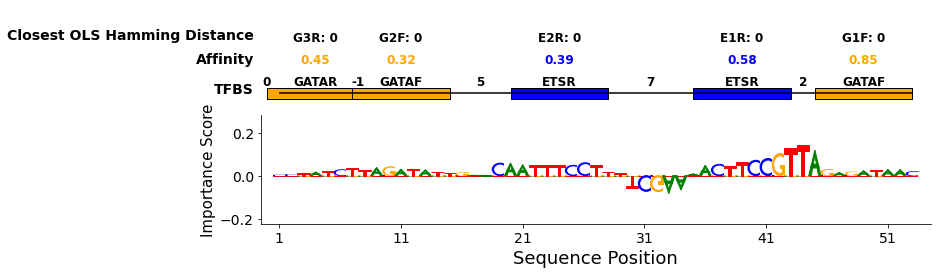

In [195]:
# Define subplots
fig, ax = plt.subplots(2, 1, figsize=(12,4), sharex=True)
plt.subplots_adjust(wspace=0, hspace=0)

# Build the annotations
h = 0.1  # height of TFBS rectangles
ax[0].set_ylim(0, 1)
ax[0].spines['bottom'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['left'].set_visible(False)
ax[0].tick_params(left = False)
ax[0].set_yticks([0.25, 0.525, 0.75])
ax[0].set_yticklabels(["TFBS", "Affinity", "Closest OLS Hamming Distance"], weight="bold")
ax[0].hlines(0.2, 1, test_seq["SEQ_LEN"], color="black")

# Build rectangles for each TFBS into a dictionary
tfbs_blocks = {}
for pos in tfbs_data.keys():
    if tfbs_data[pos][0] == "GATA":
        tfbs_blocks[pos] = mpl.patches.Rectangle((pos-2, 0.2-(h/2)), width=8, height=h, facecolor="orange", edgecolor="black")
    elif tfbs_data[pos][0] == "ETS":
        tfbs_blocks[pos] = mpl.patches.Rectangle((pos-2, 0.2-(h/2)), width=8, height=h, facecolor="blue", edgecolor="black")
        
# Plot the TFBS with annotations, should be input into function
for pos, r in tfbs_blocks.items():
    ax[0].add_artist(r)
    rx, ry = r.get_xy()
    ytop = ry + r.get_height()
    cx = rx + r.get_width()/2.0
    tfbs_site = tfbs_data[pos][0] + tfbs_data[pos][1]
    tfbs_aff = round(tfbs_data[pos][3], 2)
    closest_match = tfbs_data[pos][5] + ": " + str(tfbs_data[pos][7])
    spacing = tfbs_data[pos][4]
    ax[0].annotate(tfbs_site, (cx, ytop), color='black', weight='bold', 
                fontsize=12, ha='center', va='bottom')
    ax[0].annotate(tfbs_aff, (cx, 0.45), color=r.get_facecolor(), weight='bold', 
                fontsize=12, ha='center', va='bottom')
    ax[0].annotate(closest_match, (cx, 0.65), color="black", weight='bold', 
                fontsize=12, ha='center', va='bottom')
    ax[0].annotate(str(spacing), (((rx-spacing) + rx)/2, 0.25), weight='bold', color="black", 
            fontsize=12, ha='center', va='bottom')

# Plot the featue importance scores
viz_sequence.plot_weights_given_ax(ax[1], impscores[0], subticks_frequency=10, height_padding_factor=1)
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].set_xlabel("Sequence Position")
ax[1].set_ylabel("Importance Score");